In [1]:
#Se crea una estructura de un dataframe para cargar los datos
import pandas as pd   
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 

In [2]:
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
temp = pd.read_csv("/UCordoba/Machine Learning/Data/Sickle_data.csv")
#se muestra el dataframe
temp

,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB,Target
0,28,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,0
1,41,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,0
2,40,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,0
3,76,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,0
4,20,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359,17,0,4.86,39.2,80.7,27.7,34.4,13.4,4.40,180.0,13.5,0
360,51,0,4.85,35.2,91.7,31.0,33.8,13.3,5.60,215.0,15.0,0
361,21,1,4.47,39.7,88.7,29.3,33.0,13.5,9.20,329.0,13.1,0
362,35,1,4.75,36.2,86.7,27.9,32.1,13.5,6.48,174.0,13.2,0


In [3]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
temp.columns=temp.columns.str.strip()

In [4]:
#En X se separan las variables independientes, en este caso el tamo de los granos de arena
#X= dfNetwork[['src_port','dst_port','bidirectional_first_seen_ms','bidirectional_last_seen_ms','bidirectional_bytes']]
X= temp[['Age','Sex','RBC','MCV','PCV','MCH','MCHC','RDW','TLC','PLT /mm3','HGB']]

X                 
#En y se asigna la variable dependiente que en este caso presencia de arañas (donde 1 indicia que hay arañas y 0 no hay arañas)
y=temp['Target']
#Se visualizan las variables independientes 
X.head()

,Age,Sex,RBC,MCV,PCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,28,0,5.66,60.1,34.0,17.0,28.2,20.0,11.10,128.3,9.6
1,41,0,4.78,93.1,44.5,28.9,31.0,13.0,7.02,419.0,13.8
2,40,1,4.65,89.5,41.6,28.8,32.2,13.0,8.09,325.0,13.4
3,76,0,4.24,86.6,36.7,26.7,30.8,14.9,13.41,264.0,11.3
4,20,1,4.14,89.1,36.9,27.8,31.2,13.2,4.75,196.0,11.5


In [5]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=30)

In [6]:
#Permite viusalizar información del dataframe
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       364 non-null    int64  
 1   Sex       364 non-null    int64  
 2   RBC       364 non-null    float64
 3   PCV       364 non-null    float64
 4   MCV       364 non-null    float64
 5   MCH       364 non-null    float64
 6   MCHC      364 non-null    float64
 7   RDW       364 non-null    float64
 8   TLC       364 non-null    float64
 9   PLT /mm3  364 non-null    float64
 10  HGB       364 non-null    float64
 11  Target    364 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 34.3 KB


In [65]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(temp.describe(),2)

,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB,Target
count,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00,364.00
mean,44.92,0.44,4.28,36.76,87.51,28.23,32.05,15.12,8.86,223.75,11.91,0.09
std,18.78,0.50,0.82,6.83,9.33,3.87,2.80,2.18,4.87,99.41,2.19,0.29
min,11.00,0.00,1.36,13.10,55.70,14.70,23.60,10.60,2.00,10.00,4.20,0.00
25%,28.00,0.00,3.78,32.90,83.18,26.30,30.30,13.60,5.90,153.00,10.60,0.00
50%,44.50,0.00,4.34,36.80,87.95,28.20,31.70,14.80,7.94,210.00,12.10,0.00
75%,60.00,1.00,4.80,41.85,91.88,30.40,33.30,16.10,10.20,268.25,13.40,0.00
max,89.00,1.00,6.90,56.90,124.10,41.40,50.20,29.20,42.42,660.00,19.60,1.00


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [67]:
#X_train

In [68]:
y_train

325    0
122    0
128    0
78     0
253    0
      ..
251    0
309    1
140    0
301    0
293    0
Name: Target, Length: 254, dtype: int64

In [69]:
#Permite conocer cuantas variables se van a utilizar
cols=X.columns

In [70]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])

In [71]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,Age,Sex,RBC,MCV,PCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
count,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02
mean,4.895472e-17,1.049030e-16,3.566701e-16,-9.441267e-17,4.895472e-16,4.266054e-16,-6.993531e-16,1.398706e-17,2.447736e-17,1.748383e-17,4.301021e-16
std,1.001974e+00,1.001974e+00,1.001974e+00,1.001974e+00,1.001974e+00,1.001974e+00,1.001974e+00,1.001974e+00,1.001974e+00,1.001974e+00,1.001974e+00
min,-1.854697e+00,-9.095813e-01,-2.980604e+00,-3.314233e+00,-3.109362e+00,-3.198356e+00,-2.209281e+00,-2.090639e+00,-1.378691e+00,-2.223489e+00,-2.435739e+00
25%,-8.719070e-01,-9.095813e-01,-6.629548e-01,-4.527920e-01,-6.027198e-01,-4.904230e-01,-6.630566e-01,-6.792965e-01,-6.148785e-01,-7.235217e-01,-6.837612e-01
50%,-2.374555e-02,-9.095813e-01,5.893597e-02,2.229454e-02,-1.474209e-02,-3.803899e-02,-1.030728e-01,-1.618043e-01,-1.785570e-01,-1.368000e-01,2.911242e-02
75%,7.840273e-01,1.099407e+00,6.256836e-01,4.509646e-01,7.395715e-01,5.736352e-01,4.318371e-01,4.850610e-01,2.338018e-01,4.575746e-01,7.057382e-01
max,2.345721e+00,1.099407e+00,3.326442e+00,3.981349e+00,3.110824e+00,3.326169e+00,6.048391e+00,4.683805e+00,6.692758e+00,4.409018e+00,3.702224e+00


In [72]:
from sklearn.linear_model import LogisticRegression 
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

LogisticRegression()

In [73]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [74]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [75]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [76]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

0.9818181818181818

In [77]:
get_score(SVC(),X_train,X_test,y_train,y_test)

0.9272727272727272

In [78]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

0.990909090909091

In [79]:
get_score(GaussianNB(),X_train,X_test,y_train,y_test)

0.9818181818181818

In [80]:
from sklearn import preprocessing
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB

lg_score = []
svm_score = []
rf_score = []
nby_score = []
lda_score = []
knc_score = []
dtree_score = []
for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=y[train_index],y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lg_score.append(get_score(LogisticRegression(),X_scaled,X_test,y_train,y_test))
    svm_score.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(n_estimators=20),X_train,X_test,y_train,y_test))
    nby_score.append(get_score(GaussianNB(),X_train,X_test,y_train,y_test))
    lda_score.append(get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test))
    knc_score.append(get_score(KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree'),X_train,X_test,y_train,y_test))
    dtree_score.append(get_score(DecisionTreeClassifier(criterion='entropy'),X_train,X_test,y_train,y_test))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [81]:
lg_score

[0.8767123287671232,
 0.9452054794520548,
 0.7534246575342466,
 0.7397260273972602,
 0.625]

In [82]:
svm_score

[0.863013698630137,
 0.9452054794520548,
 0.8904109589041096,
 0.9452054794520548,
 0.9027777777777778]

In [83]:
rf_score

[0.958904109589041, 0.9863013698630136, 1.0, 1.0, 0.9722222222222222]

In [84]:
nby_score

[0.9726027397260274,
 0.9315068493150684,
 1.0,
 0.9315068493150684,
 0.9722222222222222]

In [85]:
lda_score

[0.9863013698630136,
 0.9041095890410958,
 0.958904109589041,
 0.9863013698630136,
 0.9305555555555556]

In [86]:
knc_score

[0.863013698630137,
 0.9452054794520548,
 0.8904109589041096,
 0.9452054794520548,
 0.9027777777777778]

In [87]:
dtree_score

[1.0,
 0.9452054794520548,
 0.9863013698630136,
 0.9726027397260274,
 0.9722222222222222]

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X_train,y_train)

array([0.91525424, 0.89830508, 0.9137931 , 0.9137931 , 0.9137931 ])

In [89]:
cross_val_score(LogisticRegression(),X_train,y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.98305085, 0.98305085, 0.93103448, 1.        , 1.        ])

In [90]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train)

array([1.        , 0.96610169, 0.96551724, 1.        , 1.        ])

In [91]:
cross_val_score(GaussianNB(),X_train,y_train)

array([0.98305085, 0.98305085, 0.9137931 , 1.        , 0.93103448])

In [92]:
cross_val_score(LinearDiscriminantAnalysis(),X_train,y_train)

array([0.94915254, 0.94915254, 0.89655172, 0.93103448, 1.        ])

In [93]:

cross_val_score(KNeighborsClassifier(),X_train,y_train)

array([0.91525424, 0.89830508, 0.9137931 , 0.9137931 , 0.9137931 ])

In [94]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train)

array([1.        , 0.94915254, 0.96551724, 1.        , 1.        ])

In [95]:
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se instancia el modelo de clasificación
model = RandomForestClassifier()
#Al modelo se le pasan los parámetros de entrenamiento
model.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [97]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[64,  1],
       [ 2,  5]], dtype=int64)

Text(91.72222222222221, 0.5, 'True')

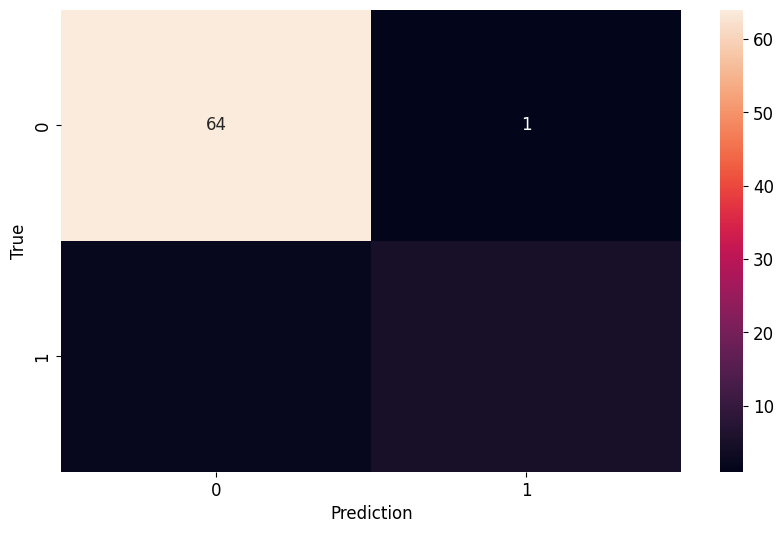

In [98]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')

In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[64  1]
 [ 2  5]]

True Positives(TP) =  64

True Negatives(TN) =  5

False Positives(FP) =  1

False Negatives(FN) =  2


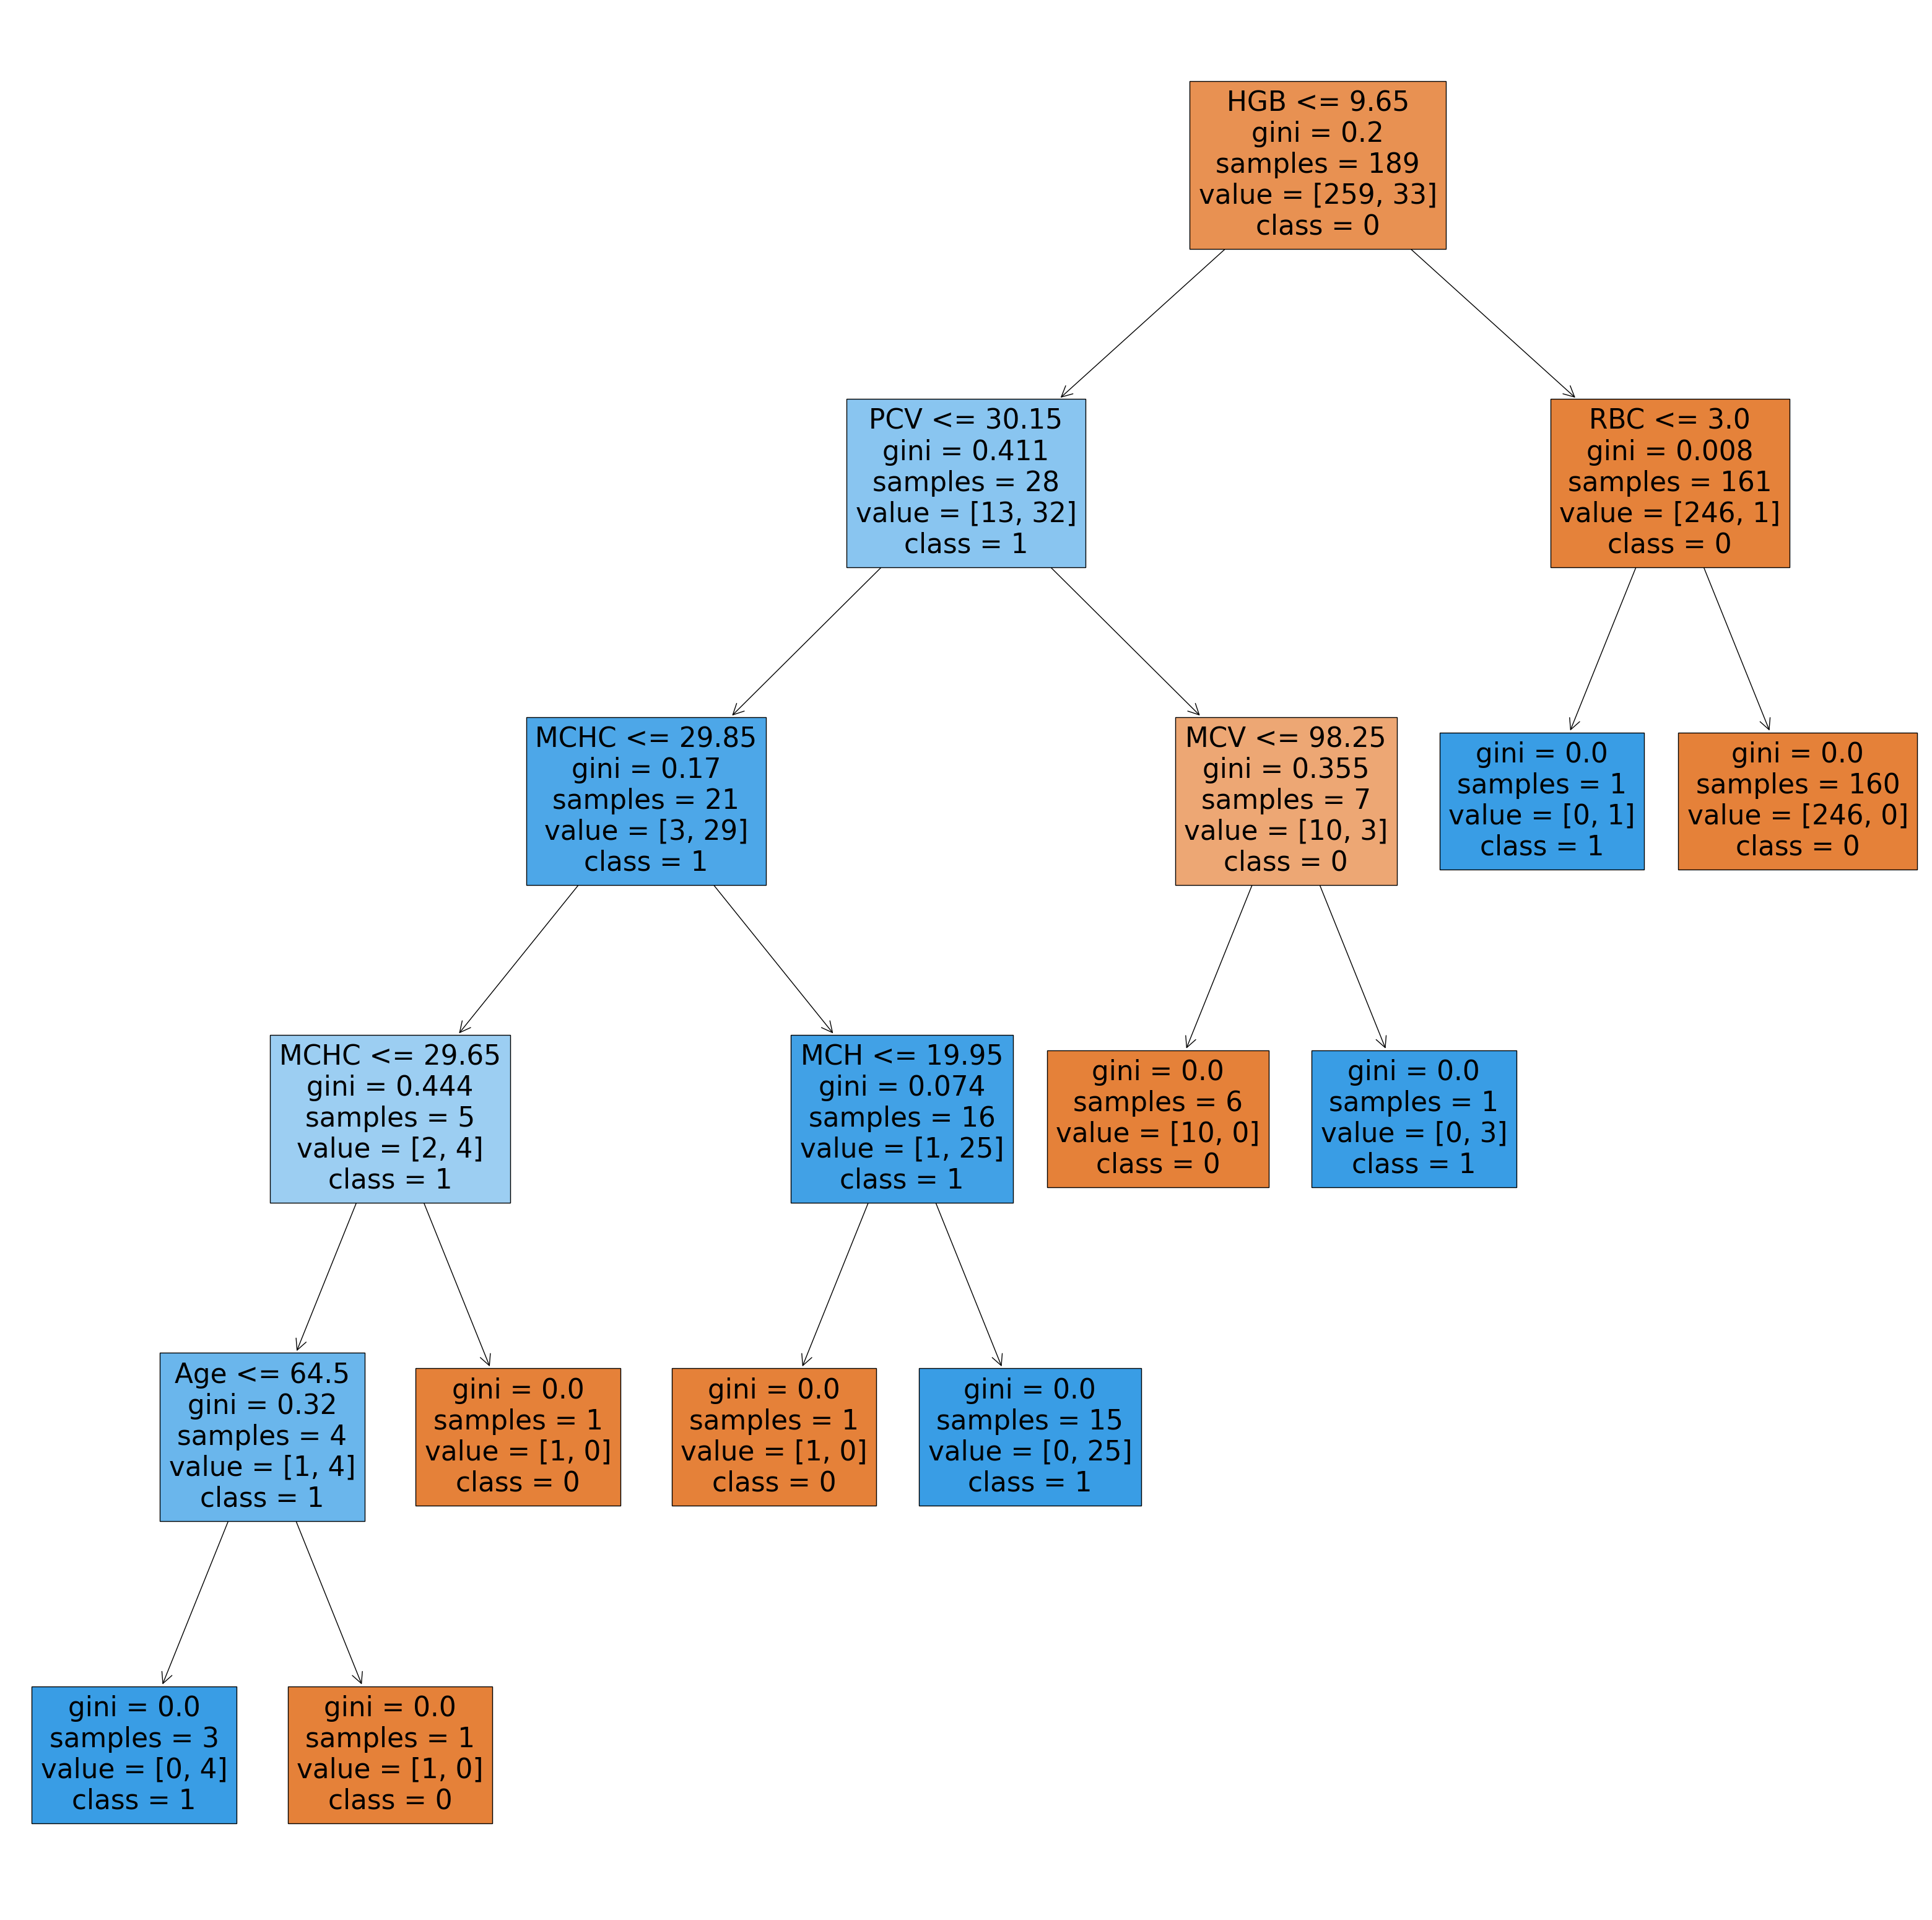

In [100]:
#Se viualiza de forma gráfica la estimación del bosque aleatorio mediante
#un árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(model.estimators_[3], feature_names = X_train.columns,class_names=["0", "1"],filled=True);

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'RBC'}>],
       [<Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'PCV'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'RDW'}>, <Axes: title={'center': 'TLC'}>],
       [<Axes: title={'center': 'PLT /mm3'}>,
        <Axes: title={'center': 'HGB'}>, <Axes: >]], dtype=object)

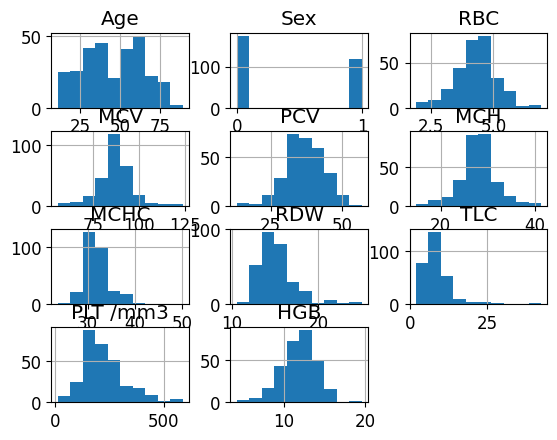

In [101]:
%matplotlib inline
X_train.hist()

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        65
           1       0.83      0.71      0.77         7

    accuracy                           0.96        72
   macro avg       0.90      0.85      0.87        72
weighted avg       0.96      0.96      0.96        72



In [103]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [104]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0417


In [105]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9846


In [106]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9697


In [107]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9697


In [108]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1667


In [109]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8333


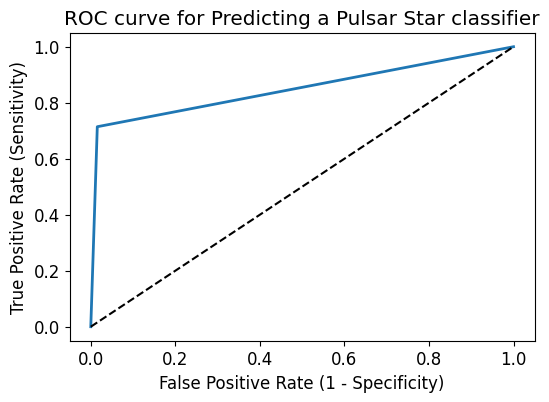

In [110]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [111]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_predicted)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8495


In [112]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9981


In [113]:
temp.corr()

,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB,Target
Age,1.000000,-0.096953,-0.121013,-0.091488,0.029824,0.055131,0.092982,-0.014405,0.232505,-0.018868,-0.089315,0.093217
Sex,-0.096953,1.000000,-0.223250,-0.285619,-0.150611,-0.229228,-0.200581,0.138318,0.022214,0.117968,-0.373981,0.065575
RBC,-0.121013,-0.223250,1.000000,0.791414,-0.346350,-0.405315,-0.195765,-0.233634,0.070206,0.039208,0.746524,-0.596473
PCV,-0.091488,-0.285619,0.791414,1.000000,0.160614,-0.018626,-0.209509,-0.312195,0.059052,-0.030149,0.853293,-0.581930
MCV,0.029824,-0.150611,-0.346350,0.160614,1.000000,0.774251,0.052354,-0.019982,-0.079189,-0.122880,0.179613,0.084599
MCH,0.055131,-0.229228,-0.405315,-0.018626,0.774251,1.000000,0.607971,-0.215952,-0.167904,-0.204836,0.250952,0.102367
MCHC,0.092982,-0.200581,-0.195765,-0.209509,0.052354,0.607971,1.000000,-0.290124,-0.162950,-0.189686,0.204836,0.050056
RDW,-0.014405,0.138318,-0.233634,-0.312195,-0.019982,-0.215952,-0.290124,1.000000,-0.049383,0.064065,-0.459526,0.327096
TLC,0.232505,0.022214,0.070206,0.059052,-0.079189,-0.167904,-0.162950,-0.049383,1.000000,0.234198,-0.043545,-0.007612
PLT /mm3,-0.018868,0.117968,0.039208,-0.030149,-0.122880,-0.204836,-0.189686,0.064065,0.234198,1.000000,-0.106364,0.032600


               Age       Sex       RBC       PCV       MCV       MCH  \
Age       1.000000 -0.096953 -0.121013 -0.091488  0.029824  0.055131   
Sex      -0.096953  1.000000 -0.223250 -0.285619 -0.150611 -0.229228   
RBC      -0.121013 -0.223250  1.000000  0.791414 -0.346350 -0.405315   
PCV      -0.091488 -0.285619  0.791414  1.000000  0.160614 -0.018626   
MCV       0.029824 -0.150611 -0.346350  0.160614  1.000000  0.774251   
MCH       0.055131 -0.229228 -0.405315 -0.018626  0.774251  1.000000   
MCHC      0.092982 -0.200581 -0.195765 -0.209509  0.052354  0.607971   
RDW      -0.014405  0.138318 -0.233634 -0.312195 -0.019982 -0.215952   
TLC       0.232505  0.022214  0.070206  0.059052 -0.079189 -0.167904   
PLT /mm3 -0.018868  0.117968  0.039208 -0.030149 -0.122880 -0.204836   
HGB      -0.089315 -0.373981  0.746524  0.853293  0.179613  0.250952   
Target    0.093217  0.065575 -0.596473 -0.581930  0.084599  0.102367   

              MCHC       RDW       TLC  PLT /mm3       HGB    T

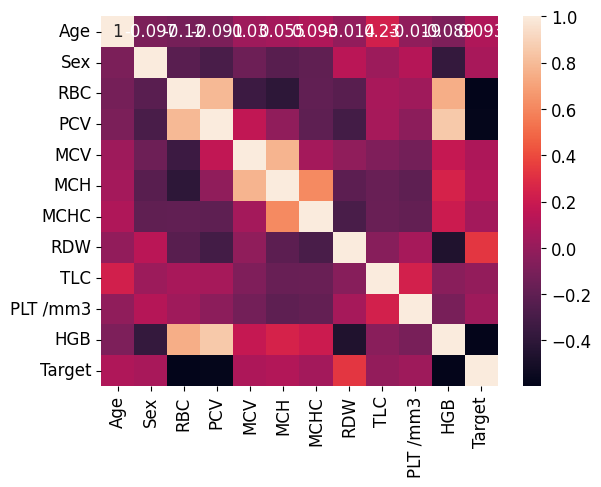

In [114]:
import seaborn as sn
correlation_matrix= temp.corr()
print(correlation_matrix)
sn.heatmap(correlation_matrix, annot=True)
print('Matrix de correlacion')
plt.show()



In [115]:
import numpy as np
covMatrix=temp.cov()
print (covMatrix)


                 Age       Sex       RBC        PCV         MCV        MCH  \
Age       352.720461 -0.905594 -1.864016 -11.736949    5.227145   4.002849   
Sex        -0.905594  0.247351 -0.091065  -0.970327   -0.699032  -0.440744   
RBC        -1.864016 -0.091065  0.672673   4.433832   -2.650938  -1.285157   
PCV       -11.736949 -0.970327  4.433832  46.660301   10.238573  -0.491869   
MCV         5.227145 -0.699032 -2.650938  10.238573   87.089287  27.933527   
MCH         4.002849 -0.440744 -1.285157  -0.491869   27.933527  14.945942   
MCHC        4.892733 -0.279500 -0.449855  -4.009703    1.368896   6.585371   
RDW        -0.588856  0.149729 -0.417069  -4.641617   -0.405865  -1.817146   
TLC        21.259028  0.053788  0.280332   1.963816   -3.597829  -3.160226   
PLT /mm3  -35.224725  5.832279  3.196637 -20.472462 -113.993424 -78.720270   
HGB        -3.667959 -0.406718  1.338850  12.745548    3.665268   2.121482   
Target      0.503360  0.009377 -0.140656  -1.142909    0.226995 

<Axes: >

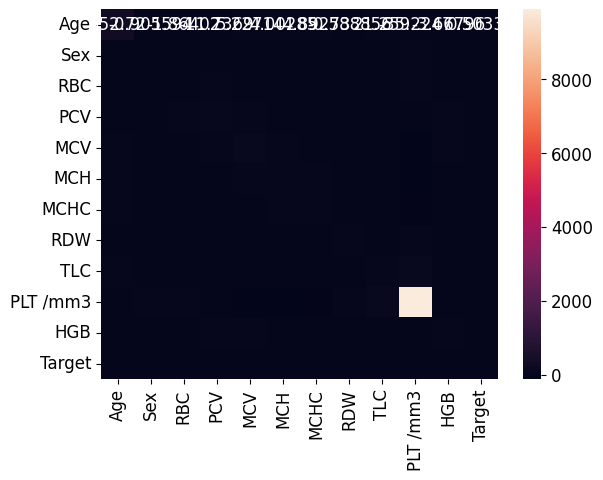

In [116]:
sn.heatmap(covMatrix, annot=True, fmt='g')

In [117]:
model.predict([[54,	1,	2.55,	24,	94.1,	31.8,	33.8,	16.7,	3.4,	112,	8.1
]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)